In [7]:
pip install Sastrawi

Note: you may need to restart the kernel to use updated packages.


=== Akurasi ===
1.0

=== Classification Report ===
              precision    recall  f1-score   support

     negatif       1.00      1.00      1.00        68
      netral       1.00      1.00      1.00        74
     positif       1.00      1.00      1.00        58

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



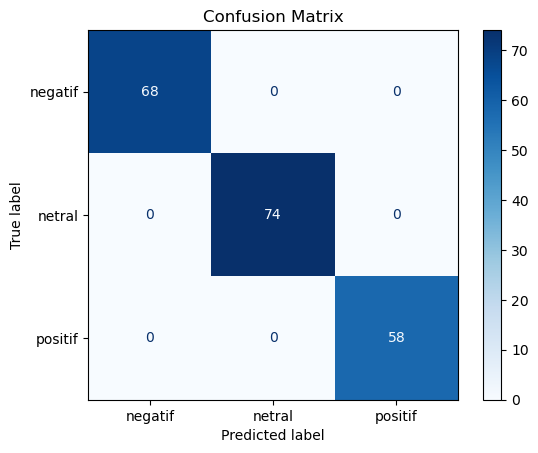

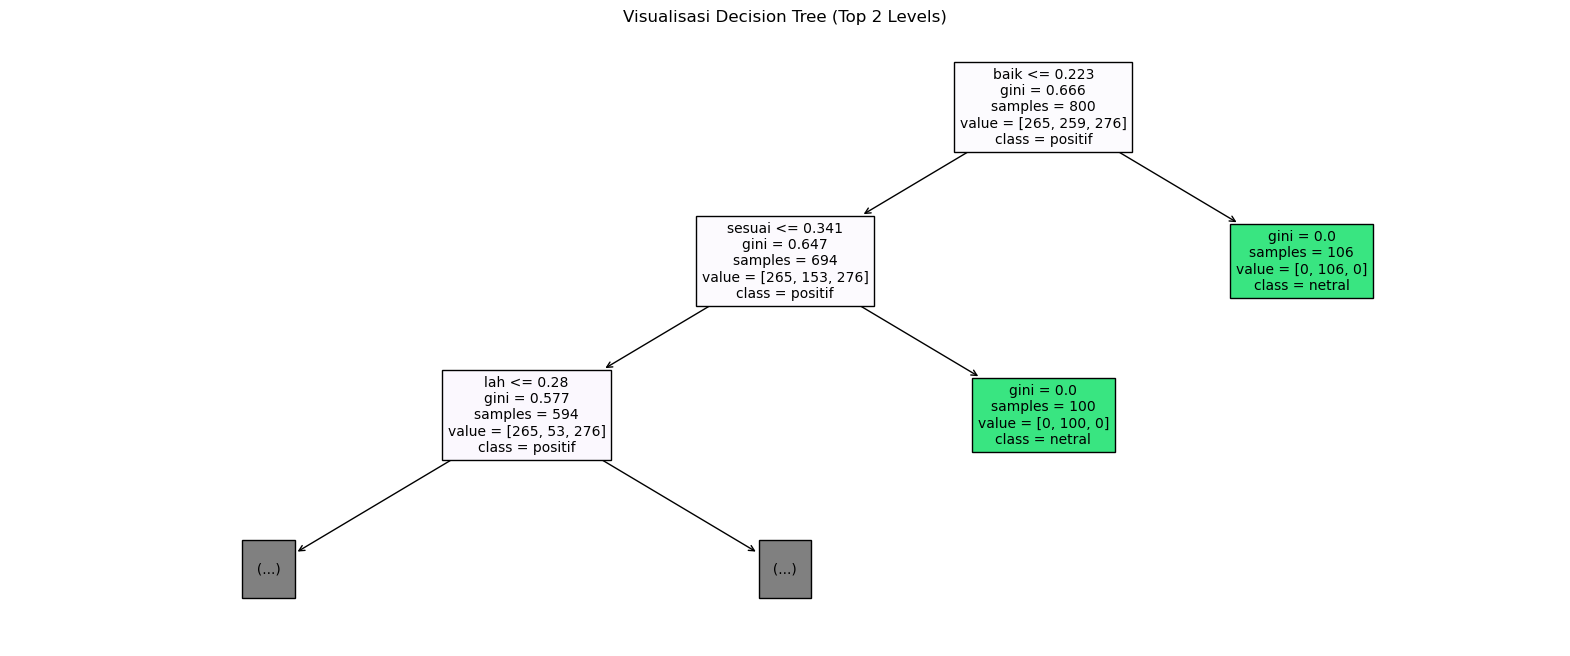

In [8]:
# ==============================================
# 1. Import Library
# ==============================================
import pandas as pd
import string
import re
import matplotlib.pyplot as plt

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

# ==============================================
# 2. Load Dataset
# ==============================================
df = pd.read_csv("review_tokopedia_indonesia.csv")
df.dropna(inplace=True)

# ==============================================
# 3. Preprocessing Teks
# ==============================================

# a. Membersihkan teks
def clean_text(text):
    text = text.lower()  # ubah ke huruf kecil
    text = re.sub(r'\d+', '', text)  # hapus angka
    text = text.translate(str.maketrans('', '', string.punctuation))  # hapus tanda baca
    return text.strip()

df["clean_review"] = df["Review"].apply(clean_text)

# b. Menghapus stopwords Bahasa Indonesia
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stopwords])

df["clean_review"] = df["clean_review"].apply(remove_stopwords)

# ==============================================
# 4. Encode Label Sentimen
# ==============================================
le = LabelEncoder()
df["label"] = le.fit_transform(df["Sentimen"])  # negatif=0, netral=1, positif=2

# ==============================================
# 5. TF-IDF Vectorizer
# ==============================================
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(df["clean_review"])
y = df["label"]

# ==============================================
# 6. Train-Test Split
# ==============================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==============================================
# 7. Decision Tree Classifier (Gini Impurity)
# ==============================================
clf = DecisionTreeClassifier(criterion="gini", random_state=42)
clf.fit(X_train, y_train)

# ==============================================
# 8. Evaluasi Model
# ==============================================
y_pred = clf.predict(X_test)

print("=== Akurasi ===")
print(accuracy_score(y_test, y_pred))

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# ==============================================
# 9. Visualisasi Decision Tree (2 Level Pertama)
# ==============================================
feature_names = tfidf.get_feature_names_out()
class_names = [str(cls) for cls in le.classes_]

plt.figure(figsize=(20, 8))
plot_tree(clf, 
          feature_names=feature_names, 
          class_names=class_names, 
          filled=True, 
          max_depth=2, 
          fontsize=10)
plt.title("Visualisasi Decision Tree (Top 2 Levels)")
plt.show()